<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Projeto_modulo_1/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
Seja bem-vindo e/ou muito bem-vinda ao meu notebook do projeto/super-desafio do módulo 1!

Nesse módulo aprendemos a fazer buscas em um banco de dados do governo brasileiro, o [**Datasus**](https://http://www2.datasus.gov.br/DATASUS/index.php?area=02), para acessar dados sobre o Sistema Único de Saúde Brasileiro (SUS). O Datasus usa uma ferramenta chamada **tabnet** para tabular os dados de forma a tornar os dados acessíveis e utilizáveis em análises computacionais. Uma ferramenta bastante útil para pesquisas na área da saúde, e, por que não, na área de ciência de dados?

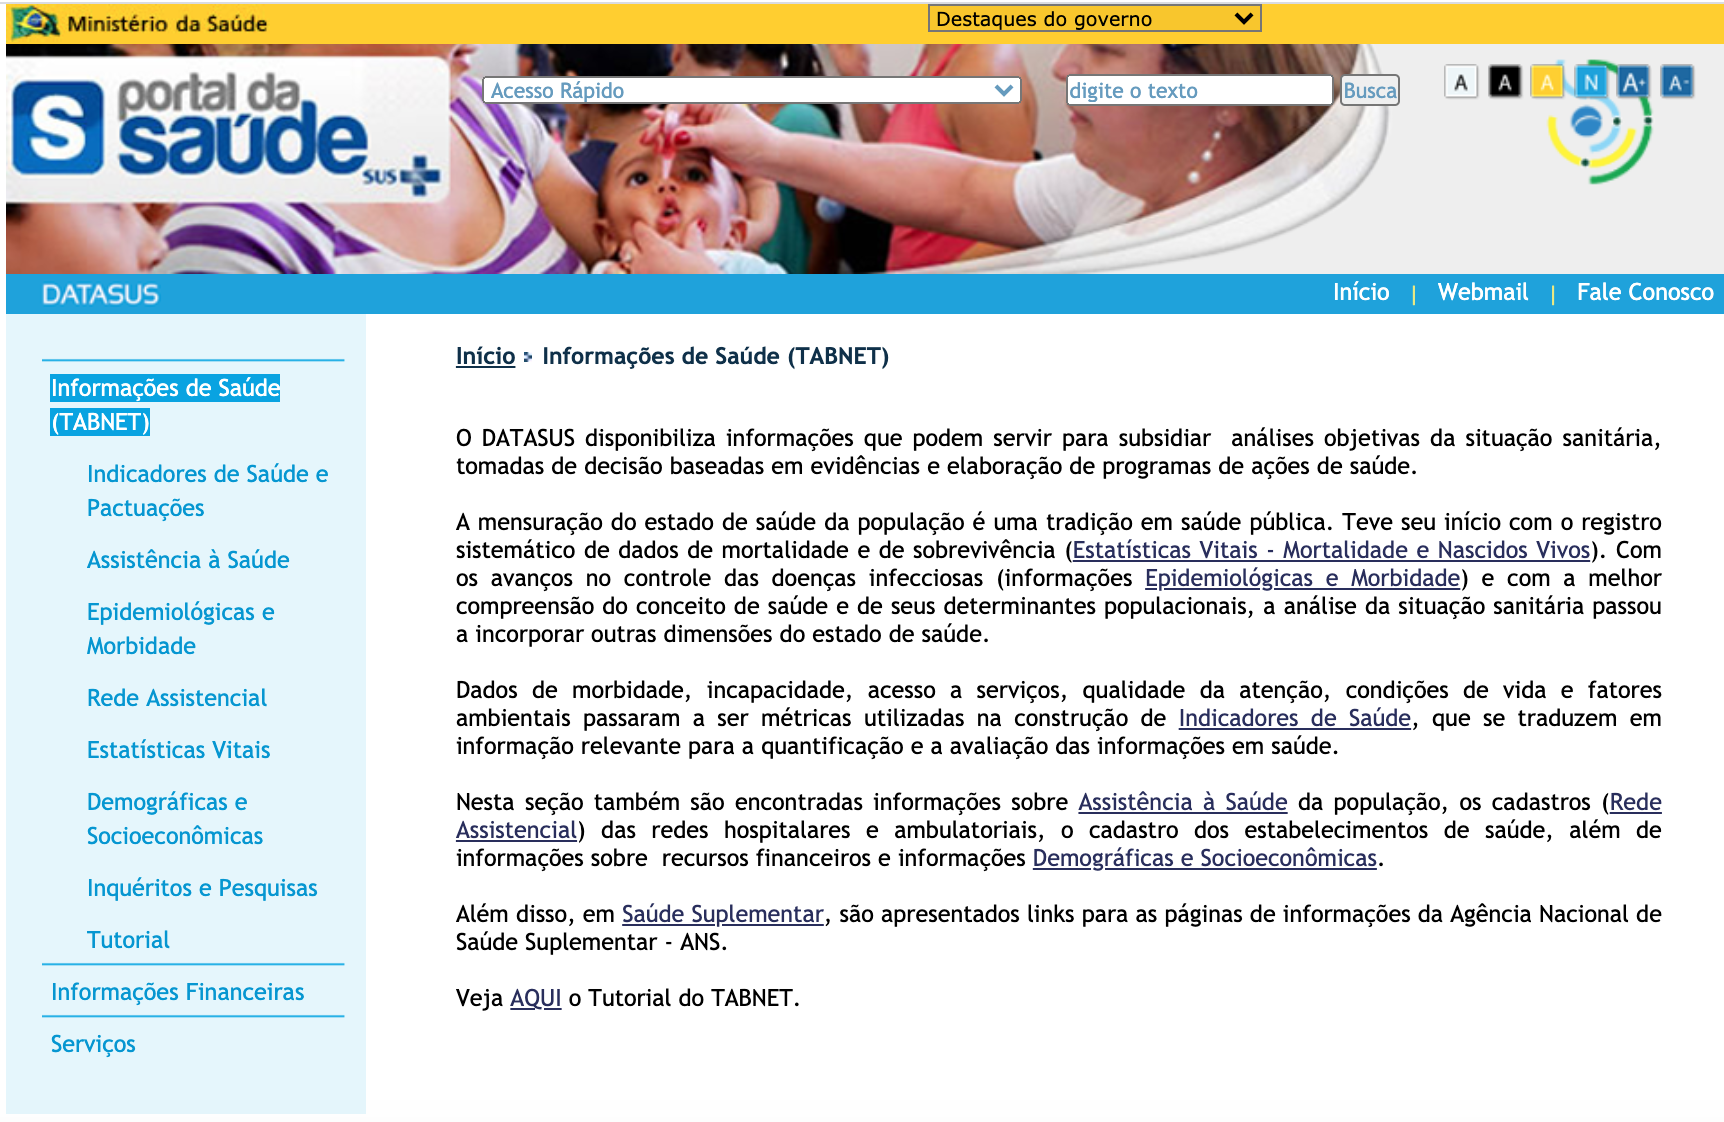

**Tela inicial do Datasus**

## Tema: Vacinas
Para este projeto, escolhi trabalhar com um assunto que está muito em alta atualmente, vacinação! Mas, por enquanto, não estou falando da vacinação contra COVID-19 (#VacinaJá!). A crise provocada pela pandemia de COVID-19 fez ressurgir o interesse pelo assunto vacinação, acompanhado de infelizes notícias falsas e teorias conspiratórias desincentivando o ato de se vacinar. Como aponta um artigo publicado na revista [Veja Saúde](https://saude.abril.com.br/medicina/por-que-as-pessoas-estao-tomando-menos-vacina/), isso infelizmente tem levado à quedas nos índices de vacinação, Brasil e mundo afora. Claro, existem outros fatores socioeconômicos não menos importantes, como o horário limitado dos postos de saúde e rotinas mais intensas de trabalho, que podem ter levado a esse fenômeno de queda.

Para o meu projeto, resolvi então analisar os dados de vacinação disponíveis no Datasus. Primeiro, olharemos para o padrão mais geral de vacinação no Brasil, depois examinaremos a nível de região, seguindo por análises mais detalhadas sobre a cobertura vacinal.

## Carregamento de bibliotecas e preparação dos dados:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Os conjuntos de dados obtidos do Datasus serão os seguintes:

*   total_reg_ano = Conjunto total de doses aplicadas, por região e por ano no Brasil;
*   total_reg_ano_ob = Como veremos mais para frente, há alguns problemas com alguns identificadores de pesquisa dos dados de vacina no Datasus, portanto, foi necessário refinar a pesquisa com outros parâmetros;
*   total_imuno = total de doses por imunizante;
*   total_imuno_ob = total de doses por imunizante da pesquisa refinada;
*   cobertura_reg_ano = dados de cobertura vacinal por região e ano;
*   cobertura_imuno_ano = dados de cobertura vacinal por imunizante e ano.

A série temporal dos dados de vacinação disponíveis no Datasus tem início no ano de 1994, e vai até os meses mais recentes de 2021 (no momento da confecção deste notebook: Mai/2021). Eu optei por não incluir o ano de 2021 pois a escala da minha pesquisa é por ano, e o ano de 2021 ainda está correndo e não teríamos dados completos. Outro motivo que me fez descartar o ano de 2021 é que a campanha atual de vacinação contra COVID-19 pode estar afetando os indíces de vacinação das outras vacinas, seja por maior alocamento de recursos ou menores taxas de vacinação geradas pelo isolamento social. Importante ressaltar que o isolamento social também pode ter influenciado os dados de vacinação de 2020.


In [33]:
total_reg_ano = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/total_reg_ano_tudo.csv",
                            encoding = "ISO-8859-1", sep = ";", index_col = 0)

total_reg_ano_ob = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/total_reg_ano_ob.csv",
                               encoding = "ISO-8859-1", sep = ";", index_col = 0)

total_imuno = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/total_imuno.csv",
                               encoding = "ISO-8859-1", sep = ";", index_col = 0)

total_imuno_ob = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/total_imuno_ob.csv",
                               encoding = "ISO-8859-1", sep = ";", index_col = 0)

cobertura_reg_ano = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/cobertura_reg_ano.csv",
                               encoding = "ISO-8859-1", sep = ";", index_col = 0, decimal = ",")

cobertura_imuno_ano = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/cobertura_imuno_ano.csv",
                              encoding = "ISO-8859-1", sep = ";", index_col = 0, decimal = ",")

Podemos notar que os valores de alguns conjuntos de dados estão na unidade de milhões de doses. Para arredondar essa escala e facilitar nossa visualização, realizei a divisão destes valores por 1000000:

In [35]:
total_reg_ano = total_reg_ano/1000000
total_reg_ano_ob = total_reg_ano_ob/1000000
total_imuno = total_imuno/1000000
total_imuno_ob = total_imuno_ob/1000000

Vamos primeiro então, analisar o padrão geral do total de milhões de doses aplicadas de 1994 até 2020:

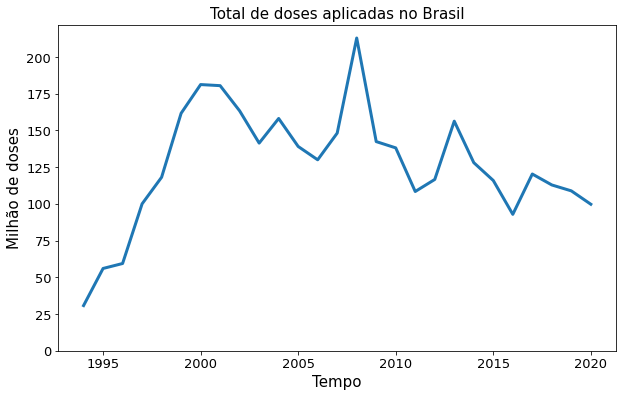

In [49]:
ax = total_reg_ano.iloc[-1,:-1].plot(figsize = (10, 6), linewidth = 3)
plt.setp(ax, xticks=[1, 6, 11, 16, 21, 26], xticklabels=["1995", "2000", "2005", "2010", "2015", "2020"])
plt.title("Total de doses aplicadas no Brasil", fontsize = 15)
plt.ylabel("Milhão de doses", fontsize = 15)
plt.xlabel("Tempo", fontsize = 15)
ax.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax.set_ylim(0)
plt.show()

Podemos notar 3 coisas neste gráfico:

*   Há um aumento expressivo nos primeiros anos 
*   Item da lista
*   Item da lista



# Por regiões:


In [5]:
cores = ["green", "darkorange", "red", "blue", "gold"]

In [6]:
total_reg_ano_nt = total_reg_ano.drop(index = "Total", columns = " Total") # nt = non-total

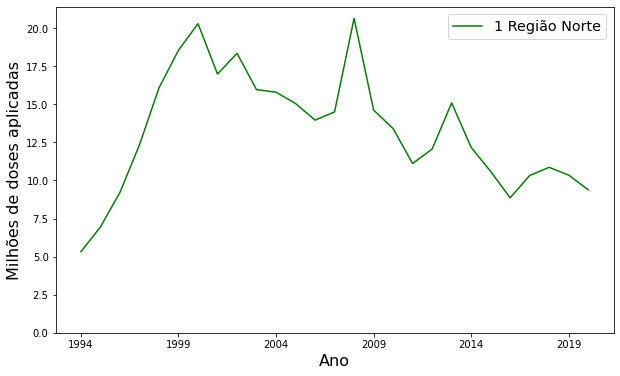

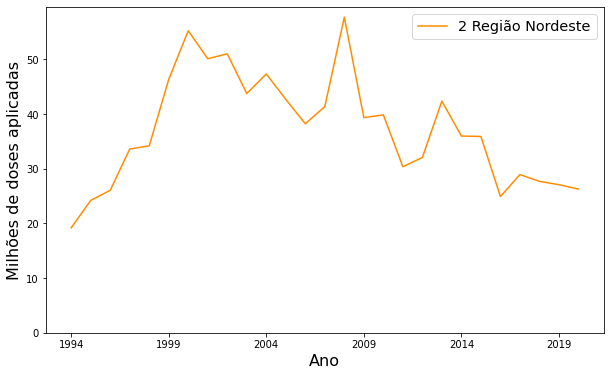

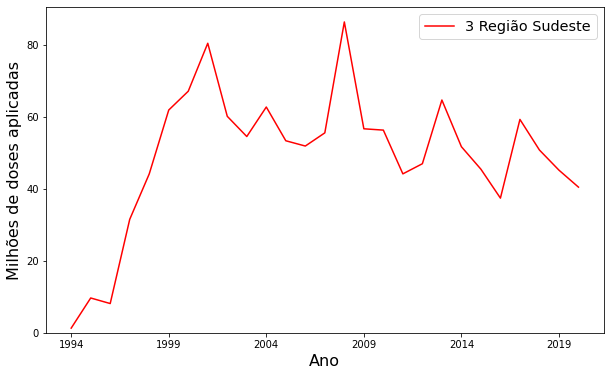

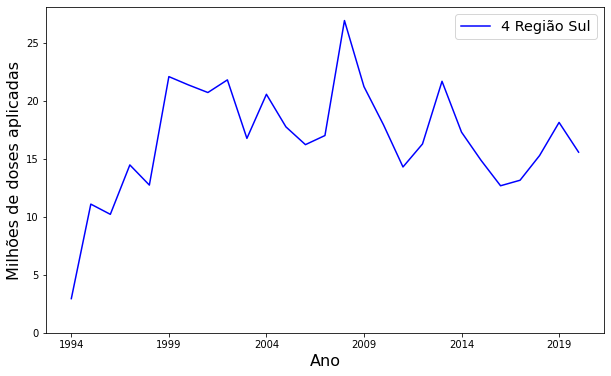

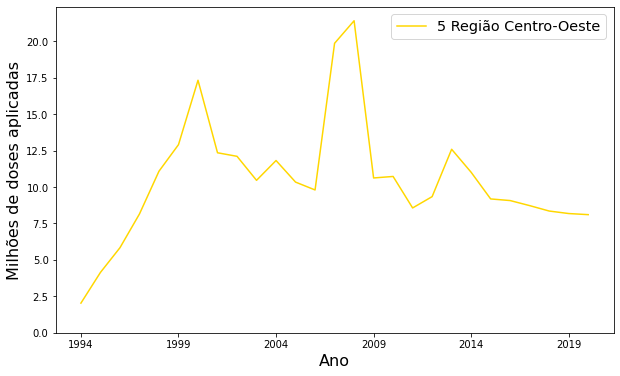

In [7]:
for i in range(total_reg_ano_nt.shape[0]):
    plt.figure(figsize=(10,6))
    ax = total_reg_ano_nt.iloc[i,].plot(color = cores[i])
    ax.set_ylim(0)
    ax.legend(fontsize = "x-large")
    ax.set_xlabel("Ano", size = 16)
    ax.set_ylabel("Milhões de doses aplicadas", size = 16)  

# Nomes confusos, redundantes e/ou não obrigatórios

In [8]:
total_imuno.index

Index(['BCG (BCG)', 'BCG - Hanseníase (BCG)', 'Febre Amarela (FA)',
       'Febre Tifóide (FT)', 'Haemophilus influenzae tipo b (Hib)',
       'Hepatite A (HA)', 'Hepatite B (HB)', 'Hepatite B não soroconversão',
       'Influenza (INF)', 'Influenza (Campanha) (INF)',
       'Influenza (Gestantes) (INF)', 'Meningococo A/C (MnAC)',
       'Meningococo B/C (MnBC)', 'Raiva Humana',
       'Raiva - Cultivo Celular/Diplóide (RC)',
       'Raiva - Cultivo Celular/Vero (RV)',
       'Raiva - Cultivo Celular/Embrionário (RG)', 'Rubéola', 'Sarampo',
       'Varicela', 'Dupla Adulto (dT)', 'Dupla Infantil (DT)',
       'Dupla Viral (rotina) (SR)', 'Dupla Viral (mulheres idade fértil) (SR)',
       'Dupla Viral (mulheres idade fértil campanha) (SR)',
       'Dupla Viral (homens) (SR)', 'Dupla Viral (homens campanha) (SR)',
       'Hexavalente (HX)', 'Poliomielite inativada (VIP)',
       'Meningocócica Conjugada - C (MncC)', 'Oral Poliomielite (VOP)',
       'Oral Poliomielite 1ª etapa campanha  

In [9]:
total_imuno_ob.index

Index(['BCG (BCG)', 'BCG - Hanseníase (BCG)', 'Febre Amarela (FA)',
       'Hepatite A (HA)', 'Hepatite B (HB)', 'Influenza (INF)', 'Varicela',
       'Dupla Adulto (dT)', 'Dupla Infantil (DT)',
       'Poliomielite inativada (VIP)', 'Meningocócica Conjugada - C (MncC)',
       'Oral Poliomielite (VOP)', 'Oral de Rotavírus Humano (VORH)',
       'Pentavalente (DTP+HB+Hib) (PENTA)', 'Pneumocócica 10valente',
       'Tetravalente (DTP/Hib) (TETRA)', 'Tríplice Bacteriana (DTP)',
       'Tríplice Viral (SCR)',
       'Tetraviral (sarampo, rubéola, caxumbae varicela)',
       'HPV Quadrivalente - Feminino', 'HPV Quadrivalente - Masculino', 'HPV',
       'Total'],
      dtype='object', name='Imunobiológicos')

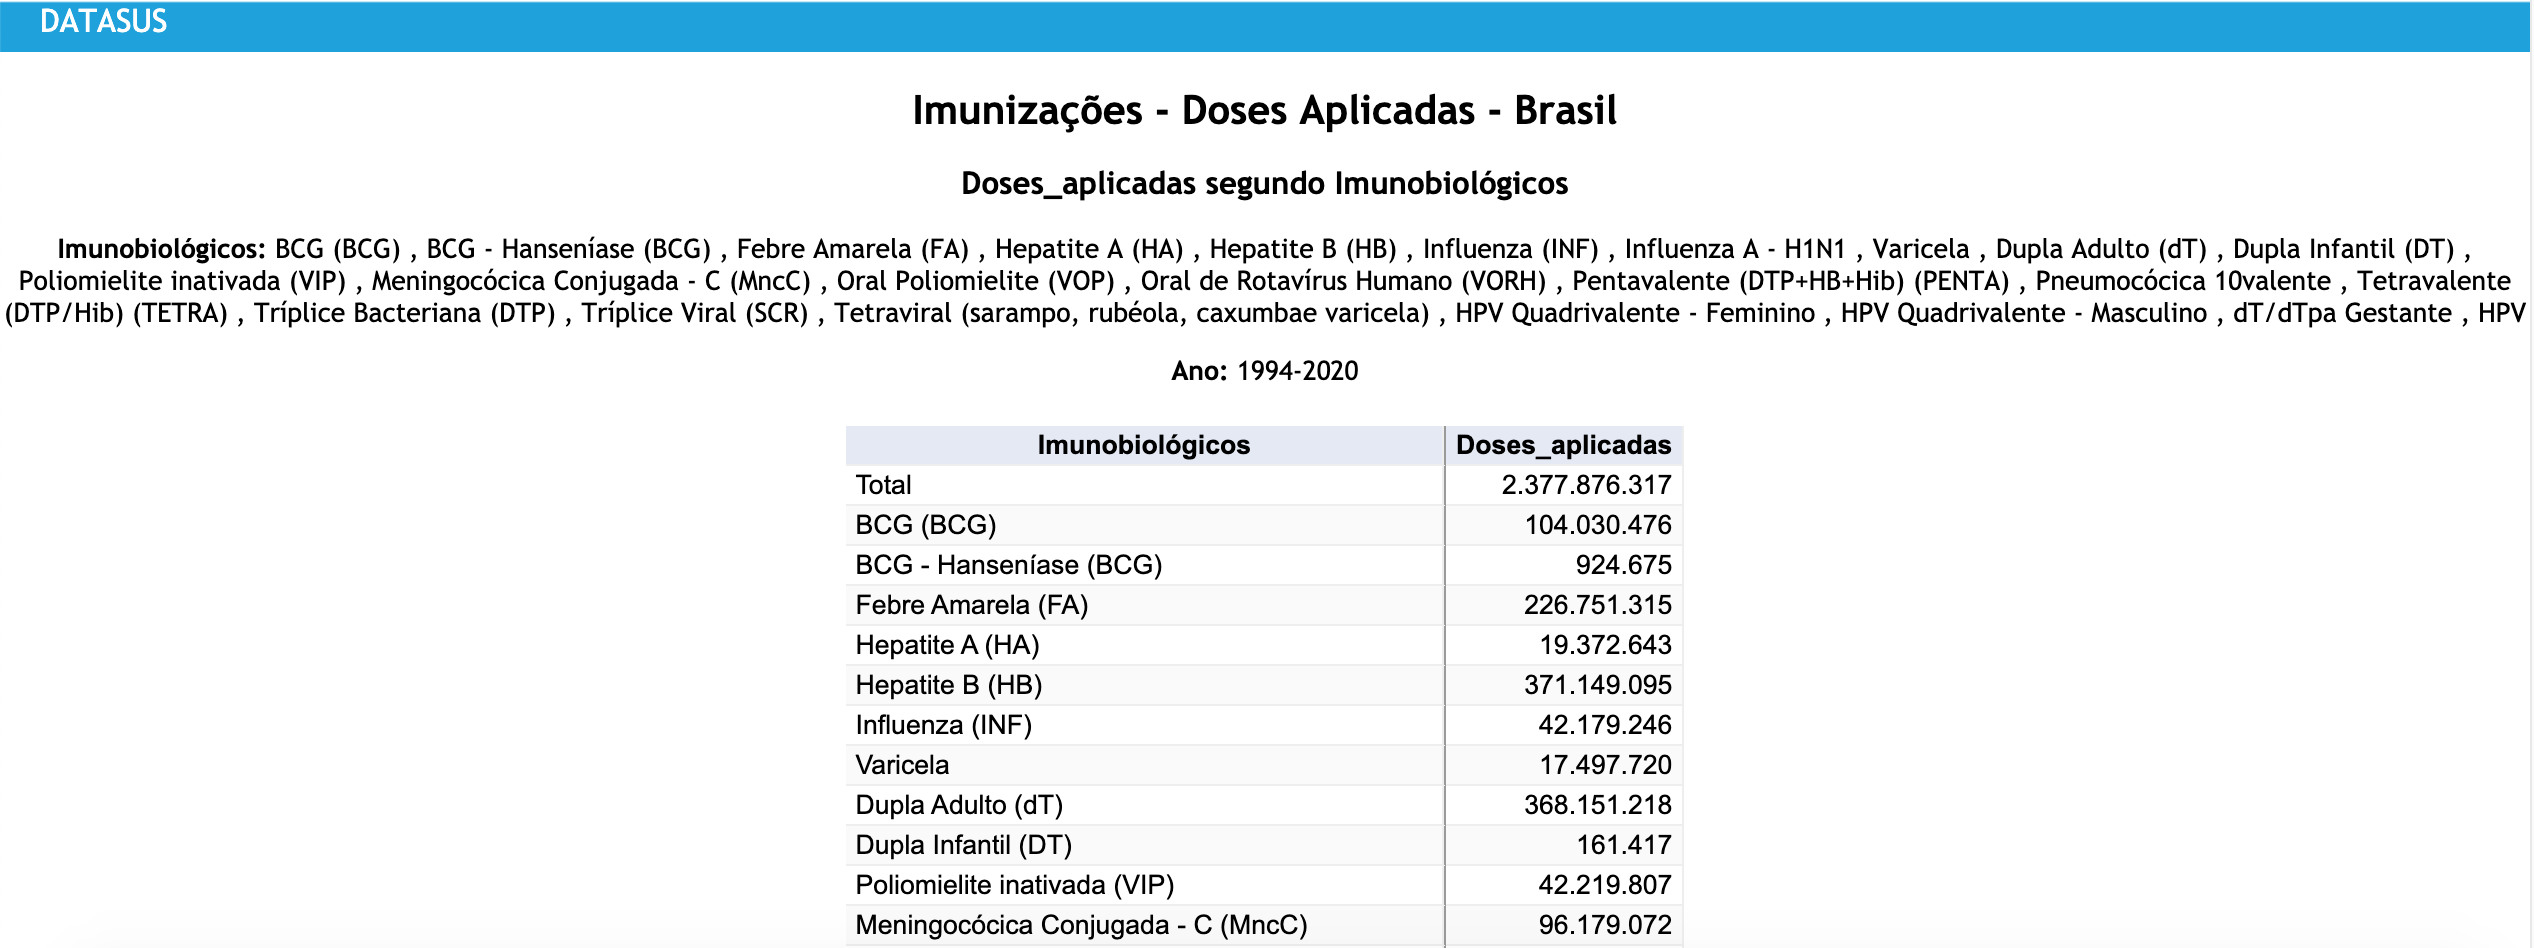

In [10]:
cobertura_imuno_ano.index

Index(['BCG', 'Hepatite B  em crianças até 30 dias', 'Rotavírus Humano',
       'Meningococo C', 'Hepatite B', 'Penta', 'Pneumocócica', 'Poliomielite',
       'Poliomielite 4 anos', 'Febre Amarela', 'Hepatite A',
       'Pneumocócica(1º ref)', 'Meningococo C (1º ref)',
       'Poliomielite(1º ref)', 'Tríplice Viral  D1', 'Tríplice Viral  D2',
       'Tetra Viral(SRC+VZ)', 'DTP', 'DTP REF (4 e 6 anos)',
       'Tríplice Bacteriana(DTP)(1º ref)', 'Sarampo',
       'Haemophilus influenzae b', 'Dupla adulto e tríplice acelular gestante',
       'dTpa gestante', 'Tetravalente (DTP/Hib) (TETRA)', 'Ignorado', 'Total'],
      dtype='object', name='Imuno')

(0.0, 121.03034450000001)

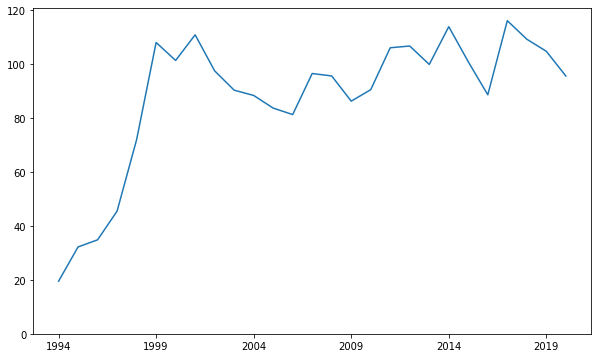

In [11]:
ax = total_reg_ano_ob.iloc[-1,:-1].plot(figsize = (10, 6))
ax.set_ylim(0)

In [12]:
total_reg_ano_ob_nt = total_reg_ano_ob.drop(index = "Total", columns = " Total")

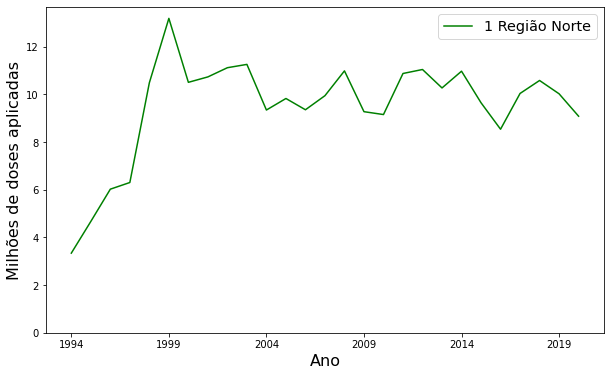

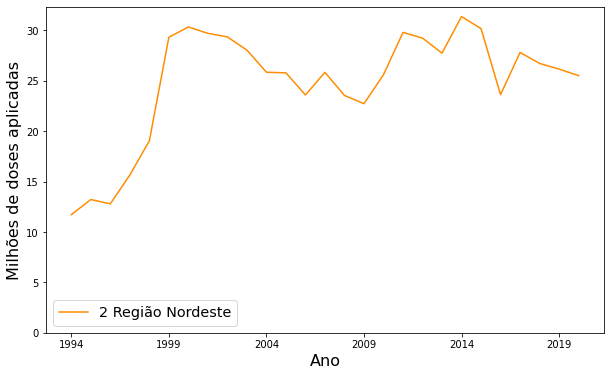

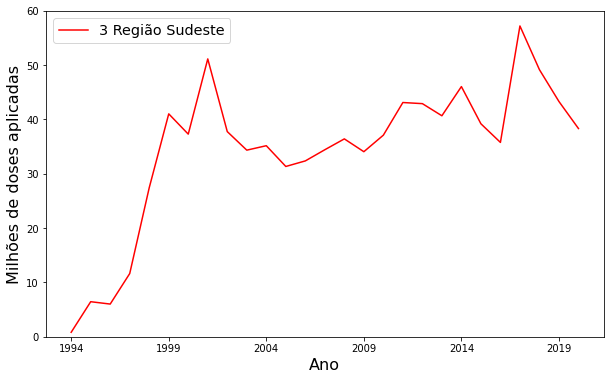

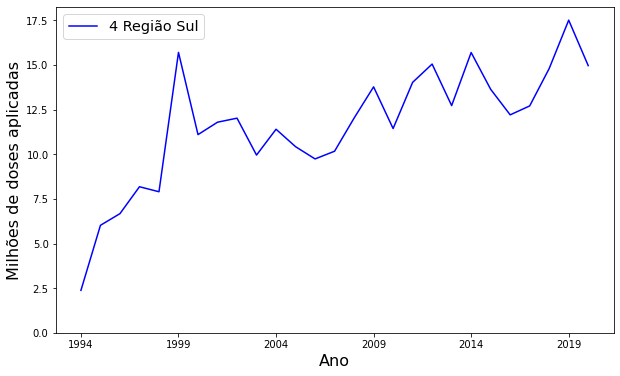

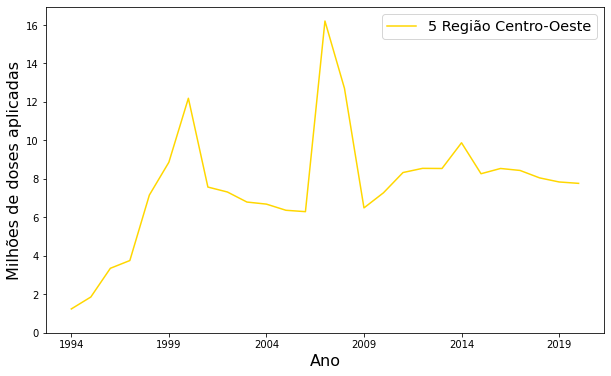

In [13]:
for i in range(total_reg_ano_ob_nt.shape[0]):
    plt.figure(figsize=(10,6))
    ax = total_reg_ano_ob_nt.iloc[i,].plot(color = cores[i])
    ax.set_ylim(0)
    ax.legend(fontsize = "x-large")
    ax.set_xlabel("Ano", size = 16)
    ax.set_ylabel("Milhões de doses aplicadas", size = 16)  

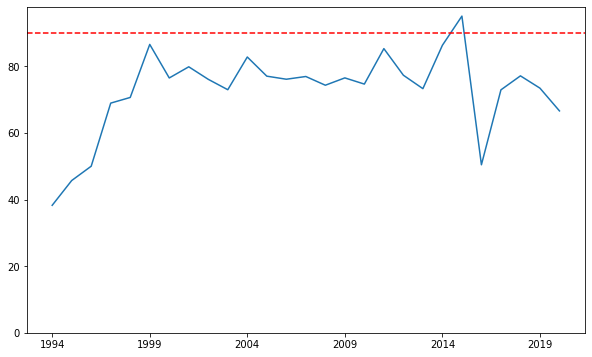

In [14]:
ax = cobertura_reg_ano.iloc[-1,:-1].plot(figsize = (10, 6))
ax.set_ylim(0)
plt.axhline(y = 90, color='red', linestyle='--')

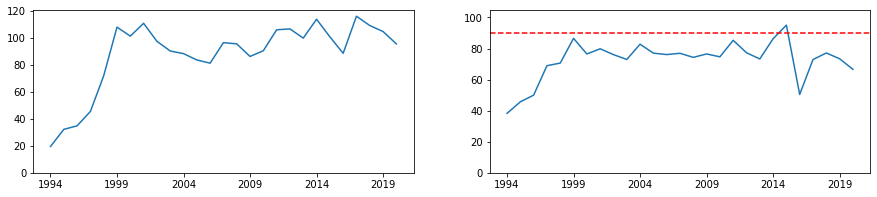

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 3))
plt.setp(ax1, xticks=[0, 5, 10, 15, 20, 25], xticklabels=["1994", "1999", "2004", "2009", "2014", "2019"])
plt.setp(ax2, xticks=[0, 5, 10, 15, 20, 25], xticklabels=["1994", "1999", "2004", "2009", "2014", "2019"])
ax1.plot(total_reg_ano_ob.iloc[-1, :-1])
ax1.set_ylim(0)
ax2.plot(cobertura_reg_ano.iloc[-1, :-1])
plt.axhline(y = 90, color='red', linestyle='--')
ax2.set_ylim(0, 105)
plt.show()

In [16]:
cobertura_reg_ano_nt = cobertura_reg_ano.drop(index = "Total", columns = " Total")

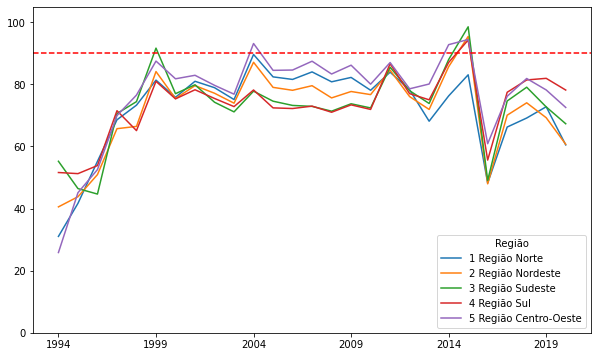

In [17]:
ax = cobertura_reg_ano_nt.T.plot(figsize = (10,6))
plt.axhline(y = 90, color='red', linestyle='--')
ax.set_ylim(0, 105)
plt.show()

# Vacinas mais comuns

In [18]:
total_imuno_ob_nt = total_imuno_ob.drop(index = "Total")
total_imuno_ob_nt.index

Index(['BCG (BCG)', 'BCG - Hanseníase (BCG)', 'Febre Amarela (FA)',
       'Hepatite A (HA)', 'Hepatite B (HB)', 'Influenza (INF)', 'Varicela',
       'Dupla Adulto (dT)', 'Dupla Infantil (DT)',
       'Poliomielite inativada (VIP)', 'Meningocócica Conjugada - C (MncC)',
       'Oral Poliomielite (VOP)', 'Oral de Rotavírus Humano (VORH)',
       'Pentavalente (DTP+HB+Hib) (PENTA)', 'Pneumocócica 10valente',
       'Tetravalente (DTP/Hib) (TETRA)', 'Tríplice Bacteriana (DTP)',
       'Tríplice Viral (SCR)',
       'Tetraviral (sarampo, rubéola, caxumbae varicela)',
       'HPV Quadrivalente - Feminino', 'HPV Quadrivalente - Masculino', 'HPV'],
      dtype='object', name='Imunobiológicos')

In [19]:
total_imuno_ob_nt = total_imuno_ob_nt.sort_values(by=["Doses_aplicadas"], ascending = False)
total_imuno_ob_nt["Vacina"] = total_imuno_ob_nt.index

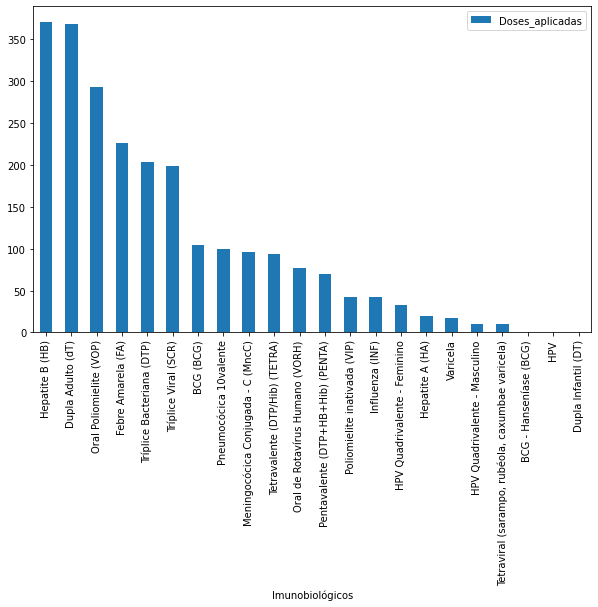

In [20]:
total_imuno_ob_nt.plot(kind = "bar", figsize = (10, 6))
#plt.legend(bbox_to_anchor = (1.1, 1.2))

# Por região, ia ser mais influenciada pela população, não seria possível detectar tendências diferentes.

In [28]:
cobertura_imuno_total = cobertura_imuno_ano.iloc[:-2,-1].copy()
cobertura_imuno_total = cobertura_imuno_total.sort_values(ascending = False)

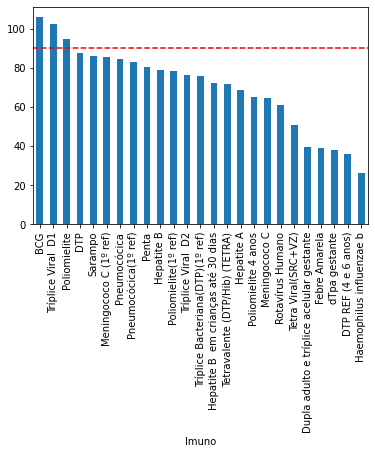

In [29]:
cobertura_imuno_total.plot(kind = "bar")
plt.axhline(y = 90, color = 'red', linestyle='--')

# Fazer agora cobertura por ano, de 2014 pra cá:

In [30]:
cobertura_imuno_ano_nt = cobertura_imuno_ano.iloc[:-2, 20:27]

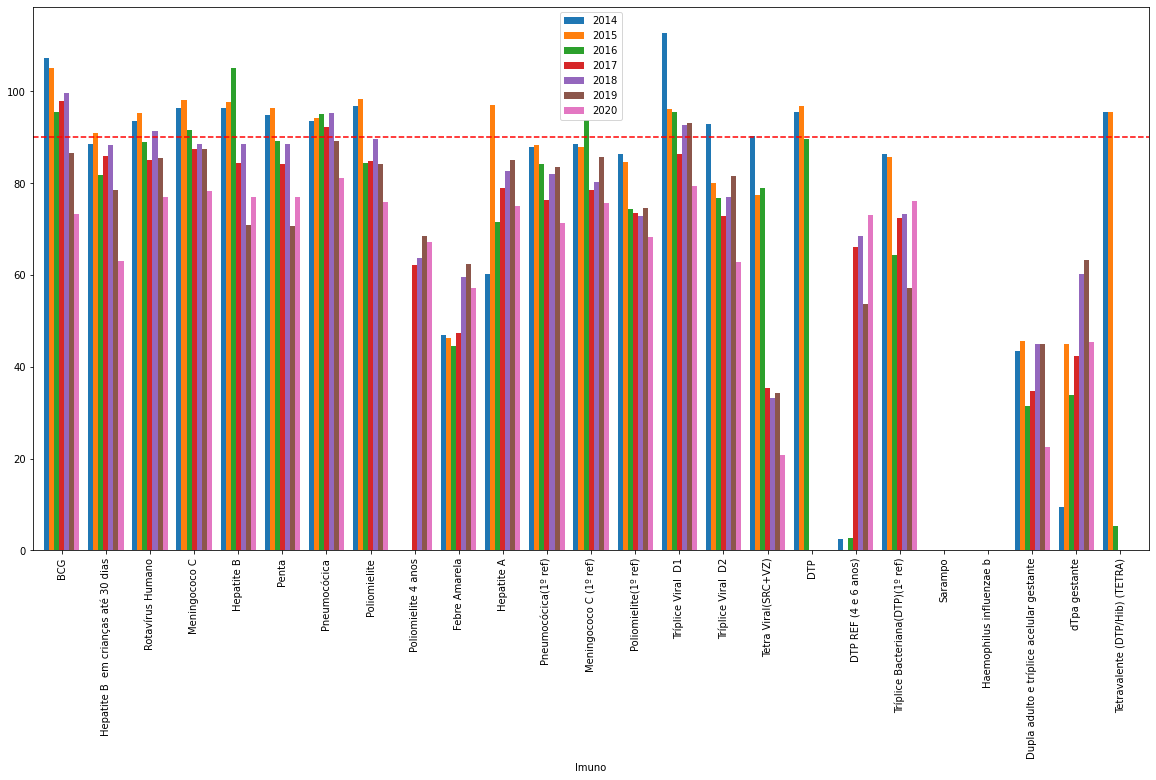

In [31]:
ax = cobertura_imuno_ano_nt.plot(kind = "bar", figsize = (20, 10), width = 0.8)
plt.axhline(y = 90, color='red', linestyle='--')